# **Start Section:**

In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2
!pip install bayesian-optimization
!pip install optuna
!pip install catboost
!pip install gpboost
!pip install shap
!pip install ngboost
!pip install dask[dataframe]
!pip install torch seaborn
!pip install lightgbm
!pip install xgboost
!pip install lime
!pip install interpret
!pip install optunahub
!pip install cmaes

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2


You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.


  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from gpboost import GPBoostRegressor
from ngboost import NGBRegressor
import optuna
import optunahub
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from interpret import show
from interpret.blackbox import LimeTabular, ShapKernel
from optuna.samplers import RandomSampler
import random
import time
from ngboost.distns import Normal
from ngboost.scores import LogScore
from scipy.stats import norm
from optuna.samplers import BaseSampler
from optuna.samplers import GridSampler
from optuna.samplers import TPESampler
from optuna.samplers import PartialFixedSampler
from optuna.samplers import CmaEsSampler
from optuna.samplers import QMCSampler
from optuna.samplers import NSGAIIISampler
from optuna.samplers import NSGAIISampler
from optuna.samplers import BruteForceSampler
from optuna.samplers import GPSampler
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data_path = r"C:\Users\Danesh\Desktop\Concrete\train.csv"
test_data_path = r"C:\Users\Danesh\Desktop\Concrete\test.csv"
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
print("Training data loaded successfully.")
print("Test data loaded successfully.")

Training data loaded successfully.
Test data loaded successfully.


In [4]:
print("\nShape of training data:", train_data.shape)
print("First 5 rows of training data:\n", train_data.head(5))
print("\nShape of test data:", test_data.shape)
print("First 5 rows of test data:\n", test_data.head(5))


Shape of training data: (189, 8)
First 5 rows of training data:
         C    mp     FA      CA       F       W_P    Adm    str
0  280.80  70.2  858.0  1183.0    0.00  0.450000  0.610  21.56
1  372.15   0.0  975.0   525.0   52.85  0.493081  7.000  34.00
2  360.00  75.0  975.0   525.0   40.00  0.509722  7.000  28.00
3  364.30   0.0  975.0   525.0  110.40  0.503706  7.000  42.00
4  315.00  31.5  780.0  1110.0    0.00  0.370000  5.355  25.82

Shape of test data: (95, 8)
First 5 rows of test data:
         C     mp     FA     CA      F       W_P   Adm   str
0  364.30    0.0  975.0  525.0  60.40  0.503706   7.0  34.0
1  344.30   75.0  975.0  525.0  55.40  0.532965   7.0  36.0
2  390.00    0.0  975.0  525.0  60.00  0.470513   7.0  36.0
3  352.15   75.0  975.0  525.0  47.85  0.521085   7.0  35.0
4  400.00  160.0  801.0  801.0  40.00  0.300000  10.3  44.6


In [5]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
x_test= X_test
print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (189, 7)
Shape of y_train: (189,)
Shape of X_test: (95, 7)
Shape of y_test: (95,)


In [6]:
# Apply z-score normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the first five rows of the normalized data
print("\nFirst five rows of normalized X_train:")
print(X_train[:5])

print("\nFirst five rows of normalized X_test:")
print(X_test[:5])


First five rows of normalized X_train:
[[-1.56879184  0.95792014 -0.09685034  1.33138508 -0.85369002  0.16810471
  -0.08799752]
 [ 0.40300047 -0.7708921   0.73537613 -0.93459372  0.061075    0.78285857
  -0.0664621 ]
 [ 0.14074238  1.07612953  0.73537613 -0.93459372 -0.16134185  1.020321
  -0.0664621 ]
 [ 0.233558   -0.7708921   0.73537613 -0.93459372  1.05719093  0.93447436
  -0.0664621 ]
 [-0.83058388  0.00485698 -0.65166799  1.07999229 -0.85369002 -0.97347298
  -0.07200604]]

First five rows of normalized X_test:
[[ 0.233558   -0.7708921   0.73537613 -0.93459372  0.19175572  0.93447436
  -0.0664621 ]
 [-0.19814256  1.07612953  0.73537613 -0.93459372  0.1052122   1.35199213
  -0.0664621 ]
 [ 0.78829322 -0.7708921   0.73537613 -0.93459372  0.18483223  0.4608195
  -0.0664621 ]
 [-0.02870009  1.07612953  0.73537613 -0.93459372 -0.02546852  1.18246784
  -0.0664621 ]
 [ 1.0041435   3.1694207  -0.50229401  0.01587763 -0.16134185 -1.97235346
  -0.05534052]]


In [7]:
# Define the model classes
model_classes = {
    'XGBoost': XGBRegressor,
    'LightGBM': LGBMRegressor,
    'NGBoost': NGBRegressor
}

feature_names = ['C', 'mp', 'FA', 'CA', 'F', 'W_P', 'Adm']


In [8]:
def get_best_model_params(results, model_name):
    # Map model names to dictionary keys, assuming keys are strings like 'XGBoost' and not objects
    model_keys = {
        'LightGBM': 'LightGBM',
        'XGBoost': 'XGBoost',
        'GPBoost': 'GPBoost',
        'NGBoost': 'NGBoost'
    }
    
    # Ensure the requested model name is valid
    if model_name not in model_keys:
        raise ValueError(f"Model name '{model_name}' is not recognized. Available models are: {list(model_keys.keys())}")
    
    # Filter out entries for the specified model
    model_entries = {key: value for key, value in results.items() if key[0] == model_keys[model_name]}
    
    # Find the entry with the best (lowest) 'best_score'
    best_entry_key, best_entry_value = min(model_entries.items(), key=lambda item: item[1]['best_score'])
    
    # Return the best hyperparameters
    return best_entry_value['best_params']

In [9]:
def evaluation (predictions_df):
    # Define lower, median, and upper quantiles
    lower_quantile = 0.05
    median_quantile = 0.5
    upper_quantile = 0.95

# Extract predictions
    lower_preds = predictions_df[lower_quantile].values
    median_preds = predictions_df[median_quantile].values
    upper_preds = predictions_df[upper_quantile].values
    actual_values = predictions_df['Actual'].values

    # Debugging: Print the first few predictions for each quantile
    print("First few lower quantile predictions:", lower_preds[:5])
    print("First few median quantile predictions:", median_preds[:5])
    print("First few upper quantile predictions:", upper_preds[:5])

    # Calculate coverage
    in_interval = ((actual_values >= lower_preds) & (actual_values <= upper_preds))
    coverage = in_interval.mean()
    print(f"Coverage of 90% prediction interval: {coverage * 100:.2f}%")

    # Plot actual vs. predicted quantile strengths
    num_points = len(predictions_df)  # Assuming predictions_df has 100 rows
    indices = np.arange(num_points)

    plt.figure(figsize=(12, 6))
    plt.plot(indices, predictions_df['Actual'][:num_points], label='Actual Strength', marker='o', linestyle='-', color='black')

    for quantile in quantiles:
        plt.plot(indices, predictions_df[quantile][:num_points],
             label=f'Predicted Quantile {quantile}', linestyle='--')

    plt.xlabel('Sample Index')
    plt.ylabel('Strength')
    plt.title('Actual vs. Predicted Quantile Strengths')
    plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.show()

    # Plot actual values and prediction intervals
    plt.figure(figsize=(12, 6))
    plt.plot(indices, actual_values, label='Actual Strength', marker='o', linestyle='', color='black')
    plt.plot(indices, median_preds, label=f'Median Prediction ({median_quantile})', marker='x', linestyle='-', color='blue')
    plt.fill_between(
        indices,
        lower_preds,
        upper_preds,
        color='blue',
        alpha=0.5,
        label=f'Prediction Interval ({lower_quantile}-{upper_quantile})'
    )
    plt.xlabel('Sample Index')
    plt.ylabel('Strength')
    plt.title('Actual Strength with Prediction Intervals')
    plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
    plt.show()

In [10]:
def evaluation_features (predictions_df,X_test):
    # Ensure X_test is a DataFrame and rename columns to match feature_names
    if isinstance(X_test, np.ndarray):
        X_test = pd.DataFrame(X_test, columns=[f'Feature_{i}' for i in range(X_test.shape[1])])

    # Rename columns to match feature_names
    X_test.columns = feature_names

    # Loop through each feature and create a plot
    for feature_to_plot in feature_names:
        # Extract feature values corresponding to the test set
        feature_values = X_test[feature_to_plot]

        # Create a DataFrame for Plotly
        plotly_df = predictions_df.copy()
        plotly_df[feature_to_plot] = feature_values.values  # Add the feature to the DataFrame

        # Melt the DataFrame to long format
        melted_df = plotly_df.melt(
            id_vars=[feature_to_plot, 'Actual'],
            value_vars=quantiles,
            var_name='Quantile',
            value_name='Prediction'
        )

        # Optional: Sort the data for better visualization
        melted_df.sort_values(by=feature_to_plot, inplace=True)

        # Plot
        fig = px.line(
            melted_df, 
            x=feature_to_plot, 
            y='Prediction', 
            color='Quantile',
            title=f'Predicted Quantiles vs. {feature_to_plot}', 
            labels={'Prediction': 'Scour Depth'}
        )

        # Add actual values as scatter points
        fig.add_scatter(
            x=plotly_df[feature_to_plot], 
            y=plotly_df['Actual'], 
            mode='markers', 
            name='Actual Scour Depth'
        )

        # Show the plot
        fig.show()

# **Hyperparameter Tuning using Autosampler Optuna**

In [11]:
# Suppress Optuna's verbose output
optuna.logging.set_verbosity(optuna.logging.WARNING)

def hyperparameter_tuning_optuna(X_train, y_train, X_test, y_test):
    def objective(trial, model_name, model_class, param_space):
        # Suggest hyperparameters
        params = {}
        for key, values in param_space.items():
            if isinstance(values, list):
                params[key] = trial.suggest_categorical(key, values)
            elif isinstance(values, tuple):
                if len(values) == 2:
                    params[key] = trial.suggest_float(key, values[0], values[1])
                elif len(values) == 3 and isinstance(values[2], bool) and values[2]:
                    params[key] = trial.suggest_int(key, values[0], values[1])
                else:
                    raise ValueError(f"Invalid parameter range for {key}")
            else:
                raise ValueError(f"Invalid parameter type for {key}")

        # Create a new instance of the model
        model = model_class()
        model.set_params(**params)

        # Ensure the input arrays are writable
        X_train_copy = np.array(X_train, copy=True)
        y_train_copy = np.array(y_train, copy=True)
        X_test_copy = np.array(X_test, copy=True)
        y_test_copy = np.array(y_test, copy=True)

        # Train model
        model.fit(X_train_copy, y_train_copy)

        # Predict
        y_pred = model.predict(X_test_copy)

        # Calculate MSE
        mse = mean_squared_error(y_test_copy, y_pred)

        return mse

    models = {
        'XGBoost': (XGBRegressor, {
            'learning_rate': [0.01, 0.05, 0.1, 0.15],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300, 400, 500],
            'min_child_weight': [1, 3, 5],
            'gamma': [0, 0.1, 0.5, 1],
            'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
            'colsample_bytree': [0.5, 0.7, 0.9]
        }),
        'GPBoost': (GPBoostRegressor, {
            'learning_rate': [0.01, 0.05, 0.1, 0.15],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300, 400, 500],
            'num_leaves': [15, 31, 63],
            'min_child_samples': [1, 5, 10],
            'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
            'colsample_bytree': [0.5, 0.7, 0.9],
            'alpha': [0.1, 0.5, 1.0],
            'lambda': [0.1, 0.5, 1.0],
            'verbose': [-1]
        }),
        'LightGBM': (LGBMRegressor, {
            'learning_rate': [0.01, 0.05, 0.1, 0.15],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300, 400, 500],
            'num_leaves': [15, 31, 63],
            'min_child_samples': [1, 5, 10],
            'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
            'colsample_bytree': [0.5, 0.7, 0.9],
            'verbose': [-1]
        }),
        'NGBoost': (NGBRegressor, {
            'n_estimators': [100, 200, 300, 400, 500],
            'learning_rate': [0.01, 0.05, 0.1, 0.15],
            'natural_gradient': [True, False],
            'minibatch_frac': [0.5, 0.7],
            'verbose': [0]
        })
    }

    pruners = [
        optuna.pruners.MedianPruner(),
        optuna.pruners.NopPruner(),
        optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=3),
        optuna.pruners.PercentilePruner(25.0),
        optuna.pruners.SuccessiveHalvingPruner(),
        optuna.pruners.HyperbandPruner(),
        optuna.pruners.ThresholdPruner(lower=0.1),
        optuna.pruners.WilcoxonPruner()
    ]

    best_scores = {}
    for model_name, (model_class, param_space) in models.items():
        for pruner in pruners:
            pruner_name = pruner.__class__.__name__
            print(f"Running Optuna for {model_name} with {pruner_name}...")
            try:
                # Use AutoSampler from OptunaHub
                sampler = optunahub.load_module("samplers/auto_sampler").AutoSampler()
                study = optuna.create_study(direction='minimize', sampler=sampler, pruner=pruner)
                study.optimize(lambda trial: objective(trial, model_name, model_class, param_space), n_trials=50)

                best_params = study.best_params
                best_model = model_class().set_params(**best_params)
                best_model.fit(X_train, y_train)
                y_pred = best_model.predict(X_test)

                # Calculate MSE
                mse = mean_squared_error(y_test, y_pred)

                # Calculate RMSE
                rmse = np.sqrt(mse)

                # Calculate correlation coefficient
                corr_coef = np.corrcoef(y_test, y_pred)[0, 1]

                best_scores[(model_name, pruner_name)] = {
                    'best_score': mse,
                    'best_params': best_params,
                    'test_mse': mse,
                    'test_rmse': rmse,
                    'test_corr_coef': corr_coef,
                    'pruner': pruner_name
                }
                print(f"Best MSE for {model_name} with {pruner_name}: {mse} with params: {best_params}")
                print(f"Best RMSE for {model_name} with {pruner_name}: {rmse}")
                print(f"Correlation Coefficient for {model_name} with {pruner_name}: {corr_coef}")
            except Exception as e:
                print(f"Failed to run Optuna for {model_name} with {pruner_name}. Error: {e}")

    # Find the model with the best test score
    if best_scores:
        best_model_name, best_pruner_name = min(best_scores, key=lambda k: best_scores[k]['test_mse'])
        best_model_info = best_scores[(best_model_name, best_pruner_name)]
        print(f"\nBest model on test data: {best_model_name} with {best_pruner_name}")
        print(f"Test MSE: {best_model_info['test_mse']}")
        print(f"Test RMSE: {best_model_info['test_rmse']}")
        print(f"Correlation Coefficient: {best_model_info['test_corr_coef']}")
        print(f"Best Parameters: {best_model_info['best_params']}")
        print(f"Pruner Used: {best_model_info['pruner']}")
    else:
        print("No valid model configurations found.")

    return best_scores

# Example usage:
best_scores_autosampler = hyperparameter_tuning_optuna(X_train, y_train, X_test, y_test)

Running Optuna for XGBoost with MedianPruner...
Best MSE for XGBoost with MedianPruner: 7.821489521162534 with params: {'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 200, 'min_child_weight': 5, 'gamma': 0.1, 'subsample': 0.9, 'colsample_bytree': 0.7}
Best RMSE for XGBoost with MedianPruner: 2.7966926039810907
Correlation Coefficient for XGBoost with MedianPruner: 0.9601233853535016
Running Optuna for XGBoost with NopPruner...
Best MSE for XGBoost with NopPruner: 7.674360066362052 with params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400, 'min_child_weight': 5, 'gamma': 0, 'subsample': 0.8, 'colsample_bytree': 0.9}
Best RMSE for XGBoost with NopPruner: 2.770263537348397
Correlation Coefficient for XGBoost with NopPruner: 0.9608229095554207
Running Optuna for XGBoost with PatientPruner...
Best MSE for XGBoost with PatientPruner: 7.677634854391444 with params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400, 'min_child_weight': 5, 'gamma': 0.1, 'subsamp

In [12]:
best_scores_autosampler

{('XGBoost', 'MedianPruner'): {'best_score': 7.821489521162534,
  'best_params': {'learning_rate': 0.15,
   'max_depth': 7,
   'n_estimators': 200,
   'min_child_weight': 5,
   'gamma': 0.1,
   'subsample': 0.9,
   'colsample_bytree': 0.7},
  'test_mse': 7.821489521162534,
  'test_rmse': 2.7966926039810907,
  'test_corr_coef': 0.9601233853535016,
  'pruner': 'MedianPruner'},
 ('XGBoost', 'NopPruner'): {'best_score': 7.674360066362052,
  'best_params': {'learning_rate': 0.05,
   'max_depth': 7,
   'n_estimators': 400,
   'min_child_weight': 5,
   'gamma': 0,
   'subsample': 0.8,
   'colsample_bytree': 0.9},
  'test_mse': 7.674360066362052,
  'test_rmse': 2.770263537348397,
  'test_corr_coef': 0.9608229095554207,
  'pruner': 'NopPruner'},
 ('XGBoost', 'PatientPruner'): {'best_score': 7.677634854391444,
  'best_params': {'learning_rate': 0.05,
   'max_depth': 7,
   'n_estimators': 400,
   'min_child_weight': 5,
   'gamma': 0.1,
   'subsample': 0.8,
   'colsample_bytree': 0.9},
  'test_mse

# **Uncertainity evaluation with Lightgbm**

In [13]:
best_params = get_best_model_params(best_scores_autosampler, 'LightGBM')

# Define the quantiles you want to predict
quantiles = [0.05, 0.1, 0.15, 0.2, 0.3, 
             0.4, 0.5, 0.6, 0.7, 0.8, 
             0.85, 0.9, 0.95]

# Dictionary to store models for each quantile
models_quantile = {}

# DataFrame to store predictions
predictions_LGBM_df = pd.DataFrame()


# Train a model for each quantile and make predictions using LightGBM
for q in quantiles:
    # Create a copy of best_params to avoid modifying the original
    params = best_params.copy()

    # Update params with quantile-specific settings
    params.update({
        'objective': 'quantile',
        'alpha': q,
        'random_state': 42
    })

    # Initialize the model with the updated parameters
    model = LGBMRegressor(**params)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Store the model
    models_quantile[q] = model
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Add predictions to the DataFrame
    predictions_LGBM_df[q] = predictions

# Add actual target values to the DataFrame
predictions_LGBM_df['Actual'] = y_test.values.ravel()

# Print the DataFrame with predictions for each quantile
print(predictions_LGBM_df.head())

        0.05        0.1       0.15        0.2        0.3        0.4  \
0  26.693332  28.573971  31.640630  31.189738  31.324406  32.782719   
1  29.940465  31.996373  32.870810  32.472396  34.096739  36.957128   
2  32.809426  33.249756  33.773434  33.157586  31.628715  33.433446   
3  31.609382  33.305136  33.108953  32.061176  33.750094  36.640884   
4  39.991140  40.515910  42.466540  41.791791  40.645095  39.469960   

         0.5        0.6        0.7        0.8       0.85        0.9  \
0  32.219428  32.649583  32.757093  33.738667  34.134266  35.008787   
1  36.287200  36.370060  36.165859  37.553035  36.392291  36.722219   
2  35.014158  34.980493  34.615684  35.602714  35.005381  35.978385   
3  36.069387  36.173710  36.425075  37.032481  36.831628  36.711082   
4  41.651530  42.634563  45.063739  50.632540  50.870090  57.244711   

        0.95  Actual  
0  40.035519    34.0  
1  36.907705    36.0  
2  38.920611    36.0  
3  36.852352    35.0  
4  60.336328    44.6  


First few lower quantile predictions: [26.69333164 29.94046514 32.80942606 31.60938238 39.99113992]
First few median quantile predictions: [32.21942759 36.28720047 35.01415832 36.06938724 41.6515303 ]
First few upper quantile predictions: [40.03551854 36.90770458 38.92061138 36.85235185 60.33632845]
Coverage of 90% prediction interval: 58.95%


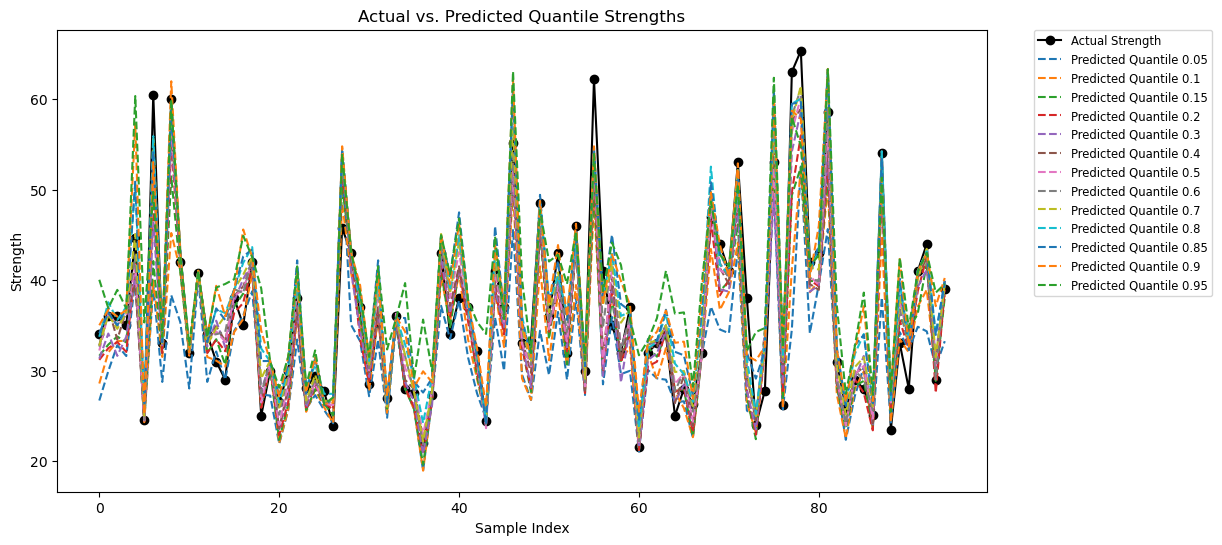

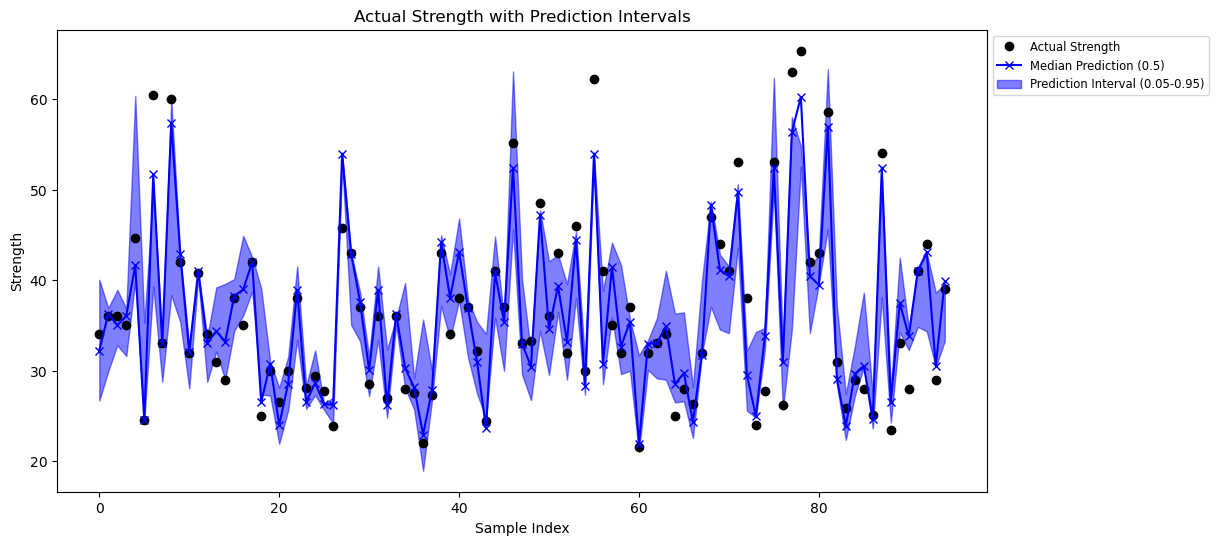

In [15]:
evaluation(predictions_LGBM_df)

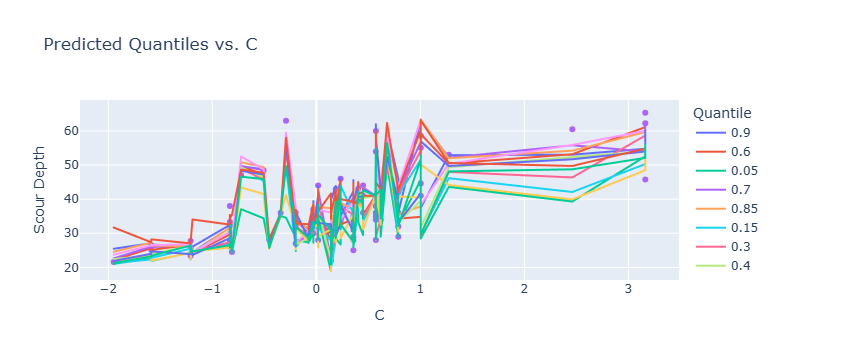

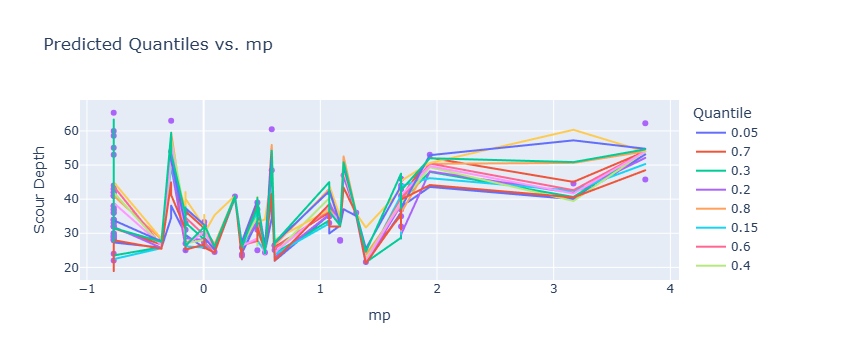

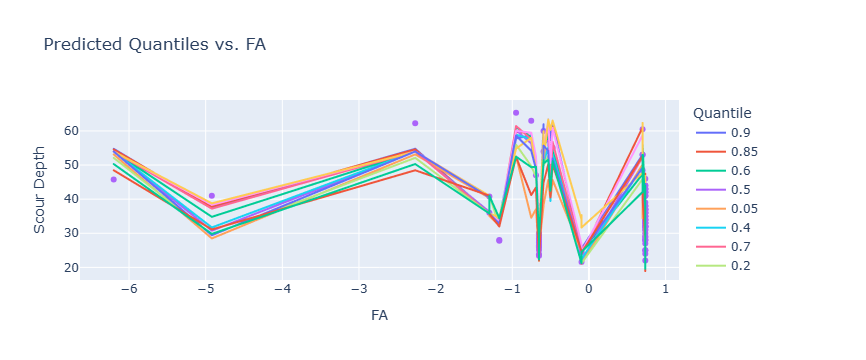

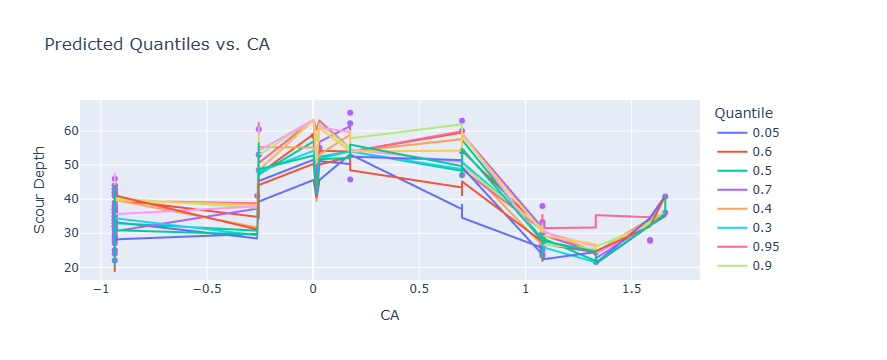

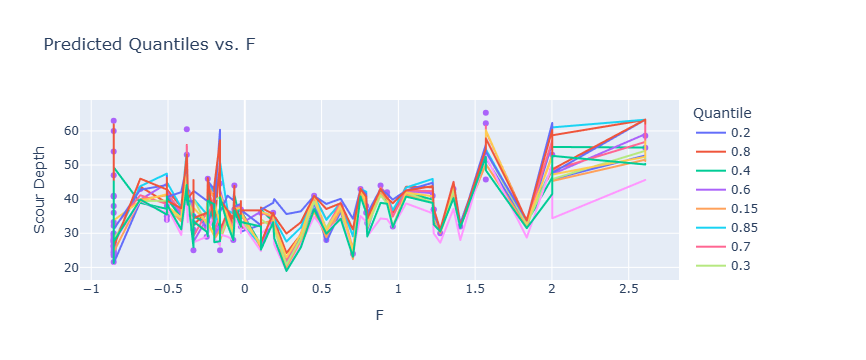

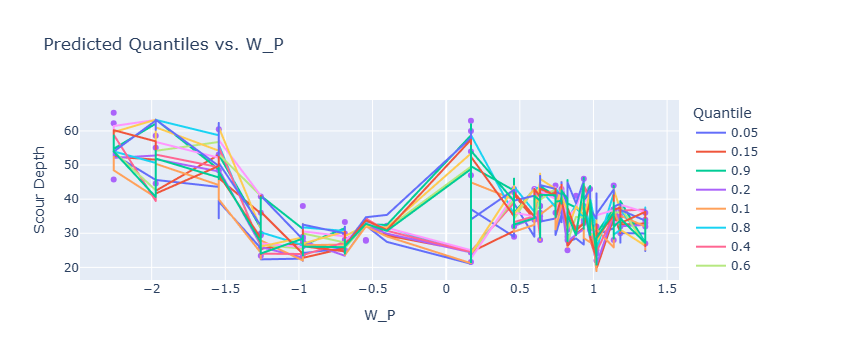

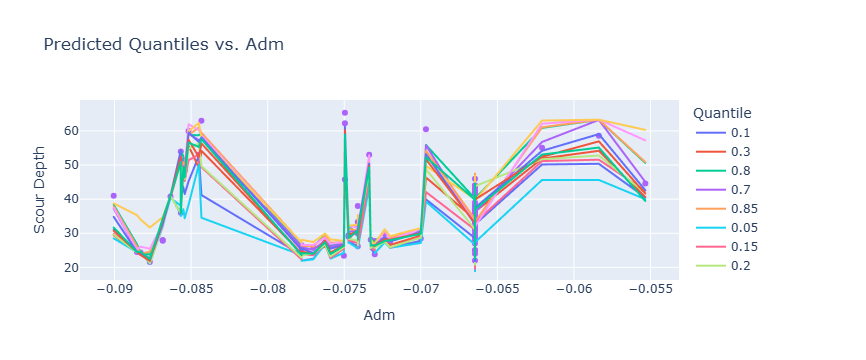

In [30]:
evaluation_features(predictions_LGBM_df,X_test)

# **Uncertainity evaluation with QXGBoost**

In [17]:
# Get the best hyperparameters for XGBRegressor
best_paramst = get_best_model_params(best_scores_autosampler, 'XGBoost')

# Define the quantiles you want to predict
quantiles = [0.05, 0.1, 0.15, 0.2, 0.3, 
             0.4, 0.5, 0.6, 0.7, 0.8, 
             0.85, 0.9, 0.95]

# Dictionary to store models for each quantile
models_quantile = {}

# DataFrame to store predictions
predictions_XGB_df = pd.DataFrame()

# Train a model for each quantile and make predictions
for q in quantiles:
    # Create a copy of best_params to avoid modifying the original
    params = best_params.copy()

    # Adjust according to your XGBoost version
    params.update({
        'objective': 'reg:quantileerror',  # Use the correct objective
        'quantile_alpha': q,                         # Use 'alpha' to set the quantile level
        'random_state': 42
    })
    
    # Initialize the model with the updated parameters
    model = XGBRegressor(**params)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Store the model
    models_quantile[q] = model
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Add predictions to the DataFrame
    predictions_XGB_df[q] = predictions

# Add actual target values to the DataFrame
predictions_XGB_df['Actual'] = y_test.values.ravel()

# Print the DataFrame with predictions for each quantile
print(predictions_XGB_df.head())

        0.05        0.1       0.15        0.2        0.3        0.4  \
0  28.340527  30.692156  31.237335  32.380291  33.029362  33.023781   
1  34.678841  34.844353  34.873734  35.142536  35.458199  36.484852   
2  32.959015  34.972267  34.962811  34.706135  34.836849  34.717464   
3  32.136936  33.161816  33.587151  33.256100  34.647911  34.339241   
4  42.533329  45.495457  45.684875  43.627377  44.313915  44.474831   

         0.5        0.6        0.7        0.8       0.85        0.9  \
0  32.486500  32.826603  33.057045  35.698174  35.752575  38.700626   
1  36.847328  36.510399  36.221775  37.499596  36.926537  36.962059   
2  34.908512  34.884510  34.778019  35.077534  35.888458  38.497002   
3  36.131443  35.692238  35.132687  35.667377  36.388336  36.700558   
4  43.551380  42.509464  45.263851  43.648811  45.344147  47.248852   

        0.95  Actual  
0  41.911606    34.0  
1  37.612209    36.0  
2  41.458843    36.0  
3  38.173954    35.0  
4  46.535118    44.6  


First few lower quantile predictions: [28.340527 34.67884  32.959015 32.136936 42.53333 ]
First few median quantile predictions: [32.4865   36.84733  34.908512 36.131443 43.55138 ]
First few upper quantile predictions: [41.911606 37.61221  41.458843 38.173954 46.53512 ]
Coverage of 90% prediction interval: 65.26%


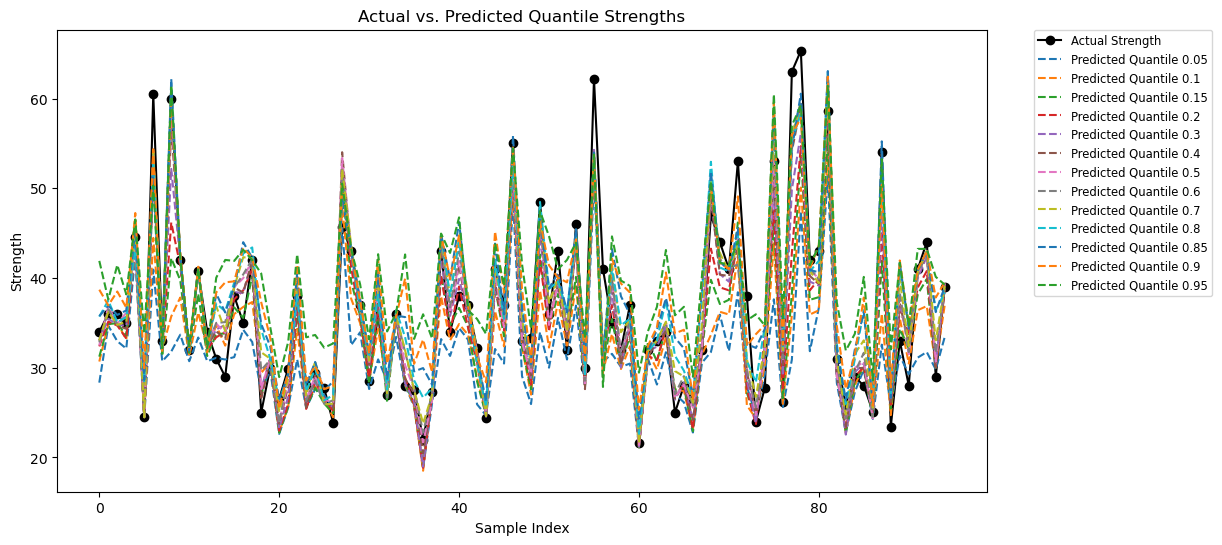

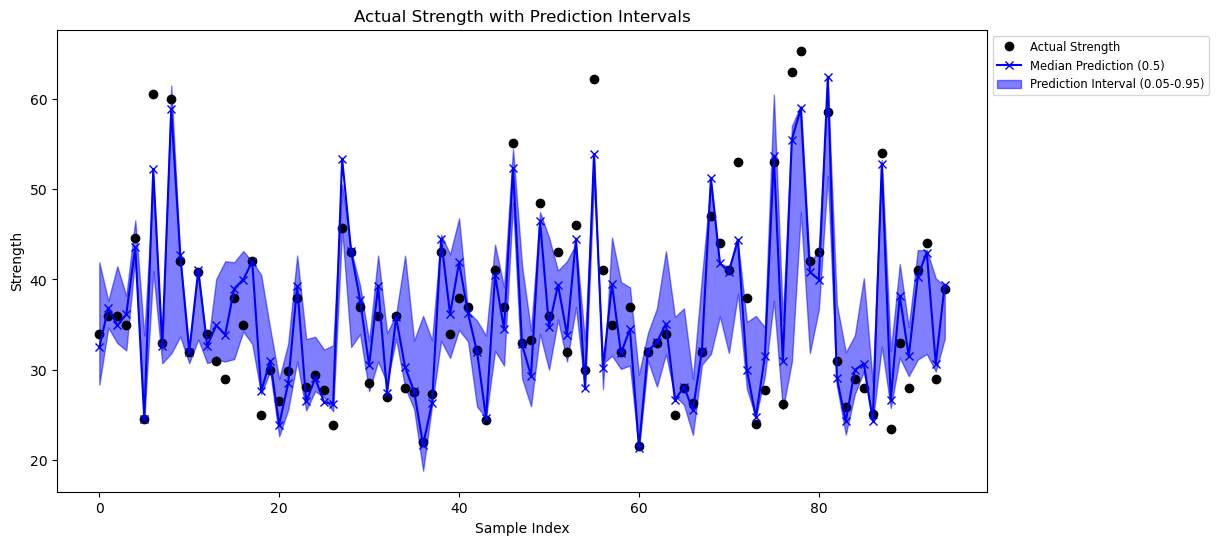

In [18]:
evaluation(predictions_XGB_df)

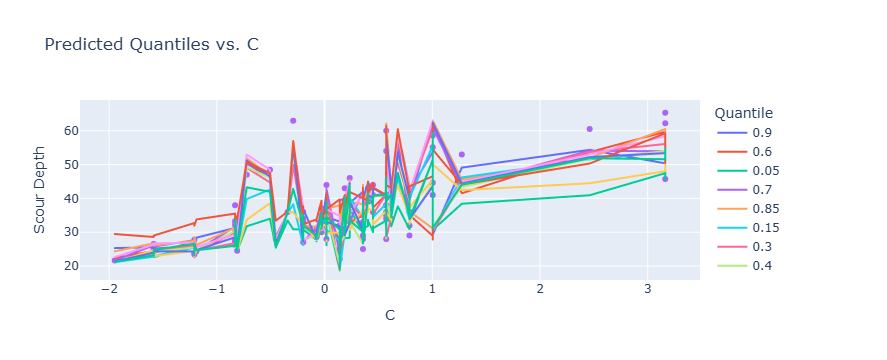

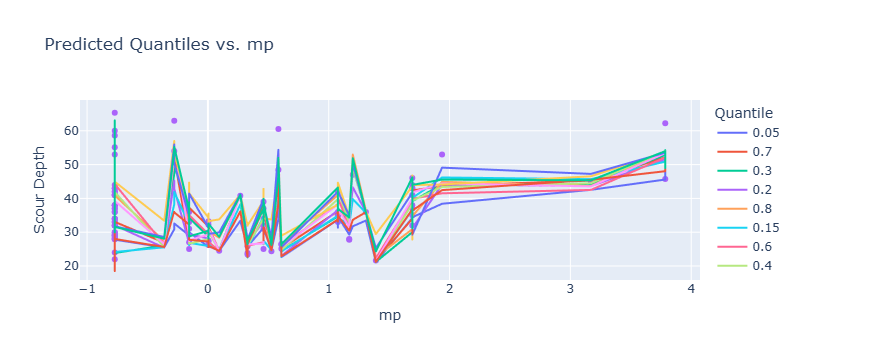

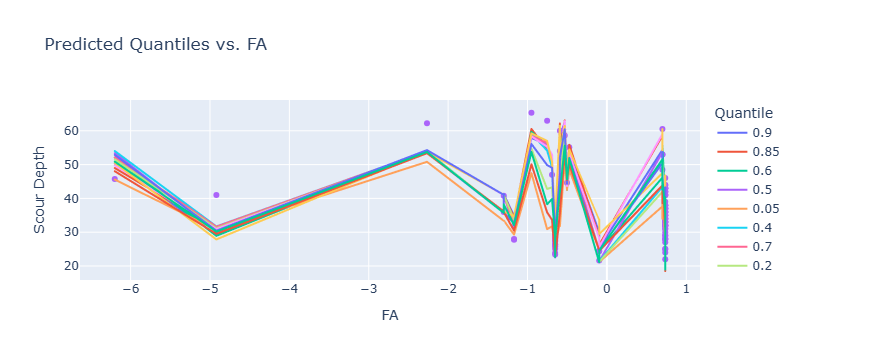

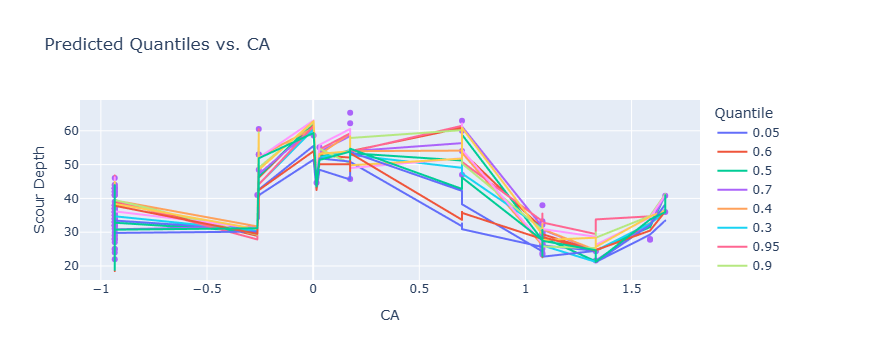

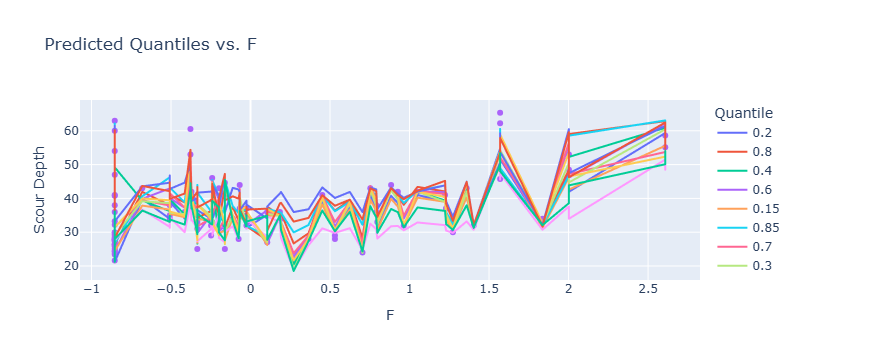

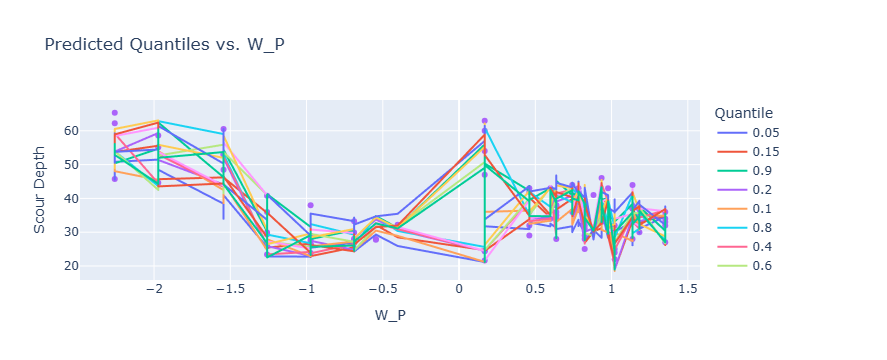

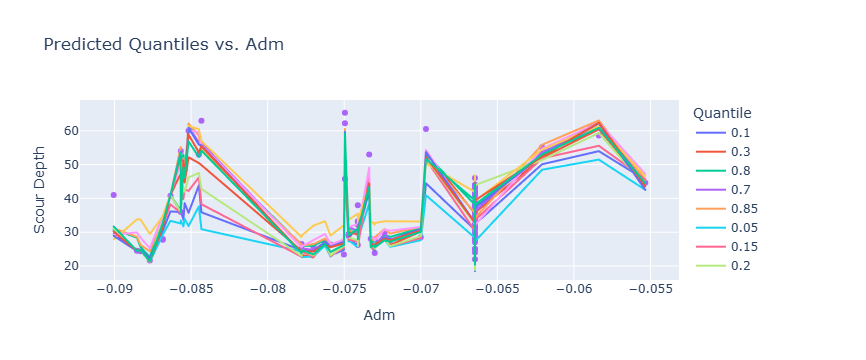

In [19]:
evaluation_features(predictions_XGB_df,X_test)

# **Uncertainity evaluation with GPBoost**

In [20]:
# Get the best hyperparameters for GPBoostRegressor
best_params = get_best_model_params(best_scores_autosampler, 'GPBoost')

# Define the quantiles you want to predict
quantiles = [0.05, 0.1, 0.15, 0.2, 0.3,
             0.4, 0.5, 0.6, 0.7, 0.8,
             0.85, 0.9, 0.95]

# Dictionary to store models for each quantile
models_quantile = {}

# DataFrame to store predictions
predictions_GPBoost_df = pd.DataFrame()

# Parameters that may conflict with quantile-specific settings
incompatible_keys = ['objective', 'alpha', 'quantile_alpha', 'boosting_type', 'metric', 'eval_metric']

# Train a model for each quantile and make predictions
for q in quantiles:
    # Create a copy of best_params to avoid modifying the original
    params = best_params.copy()
    
    # Remove incompatible parameters
    for key in incompatible_keys:
        params.pop(key, None)
    
    # Update params with quantile-specific settings
    params.update({
        'objective': 'quantile',
        'alpha': q,
        'random_state': 42
    })
    
    # Initialize the model with the updated parameters
    model = GPBoostRegressor(**params)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Store the model
    models_quantile[q] = model
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Add predictions to the DataFrame
    predictions_GPBoost_df[q] = predictions

# Add actual target values to the DataFrame
predictions_GPBoost_df['Actual'] = y_test.values.ravel()

# Print the DataFrame with predictions for each quantile
print(predictions_GPBoost_df.head())

[GPBoost] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[GPBoost] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[GPBoost] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[GPBoost] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[GPBoost] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[GPBoost] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[GPBoost] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[GPBoost] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[GPBoost] [Warning] lambda_l2 is

First few lower quantile predictions: [27.05131829 27.5338378  33.44657307 29.14444845 38.36226715]
First few median quantile predictions: [32.68384016 36.84082566 34.95374886 36.14891162 45.60541703]
First few upper quantile predictions: [40.77625585 38.32115358 40.97007399 38.00740311 60.630216  ]
Coverage of 90% prediction interval: 71.58%


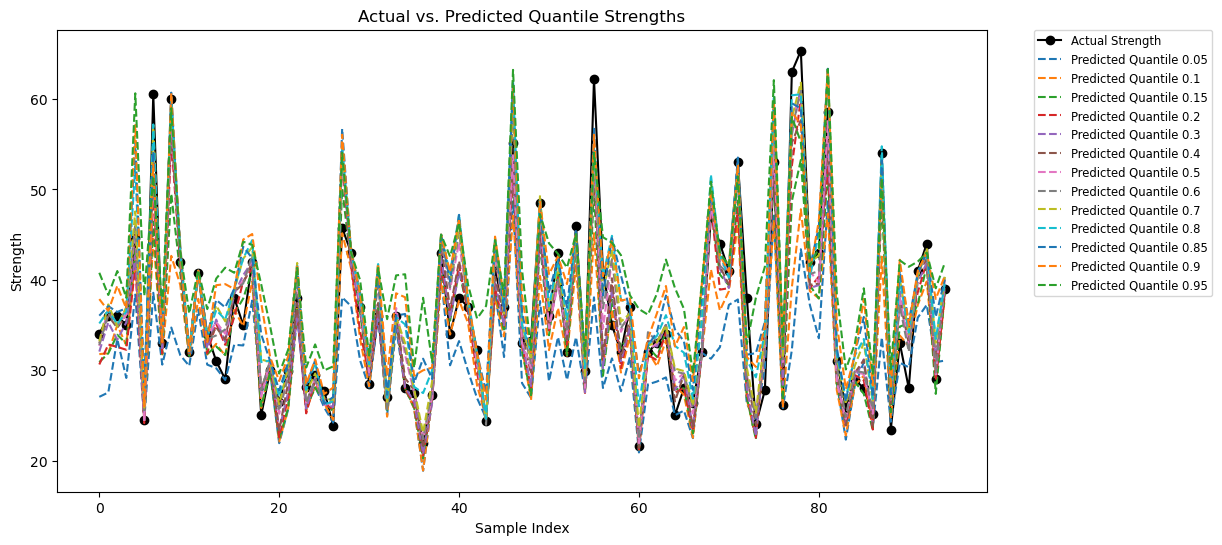

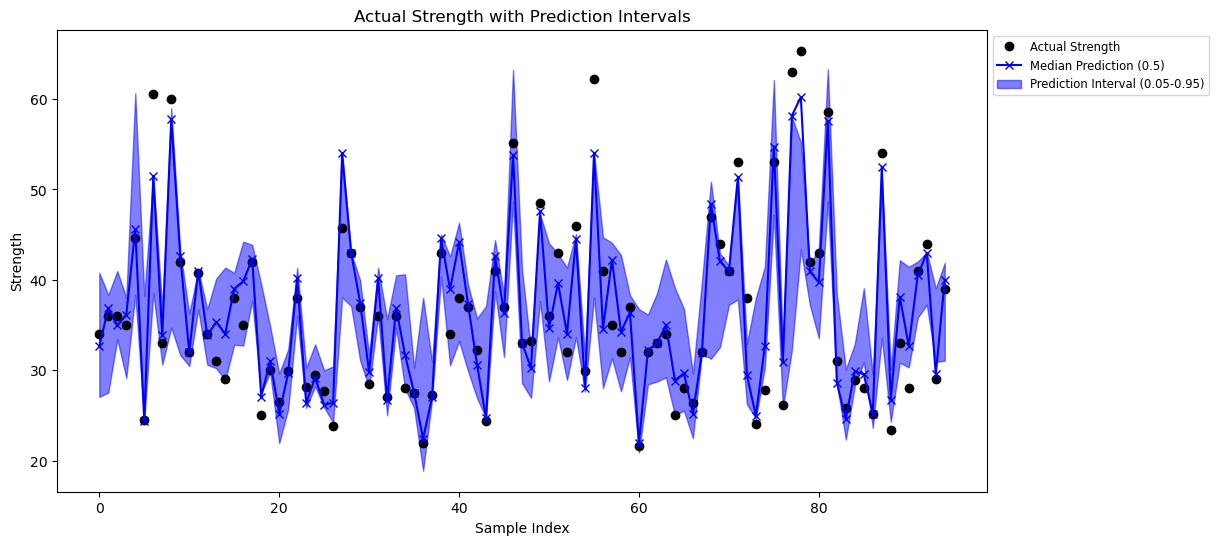

In [21]:
evaluation(predictions_GPBoost_df)

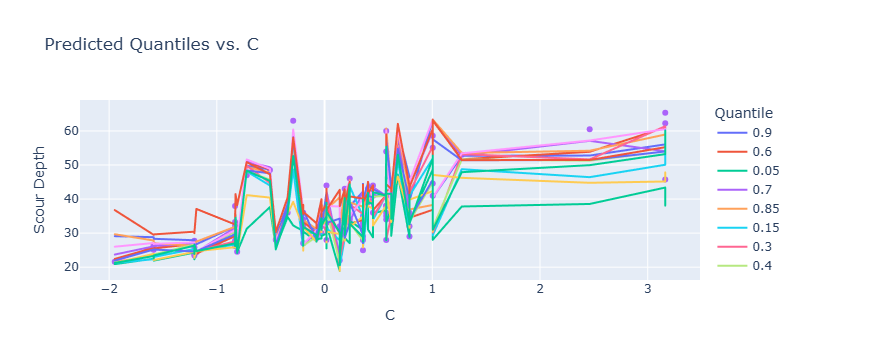

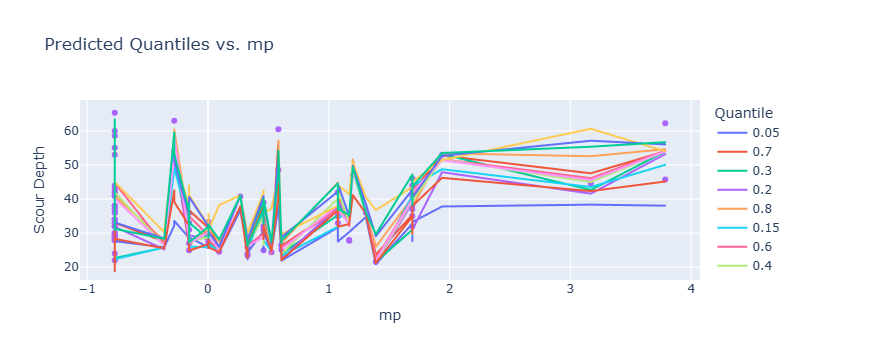

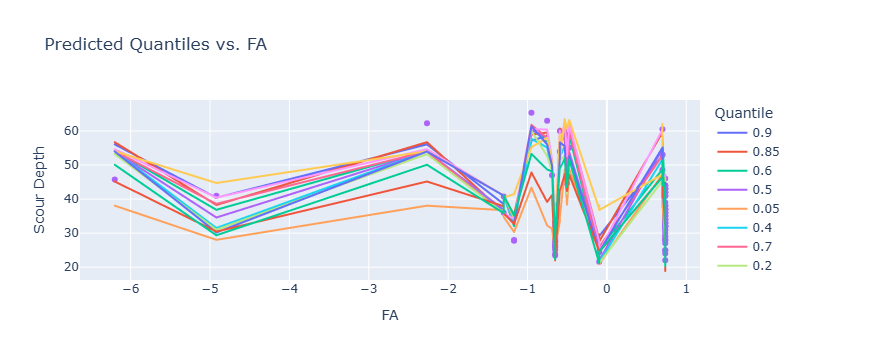

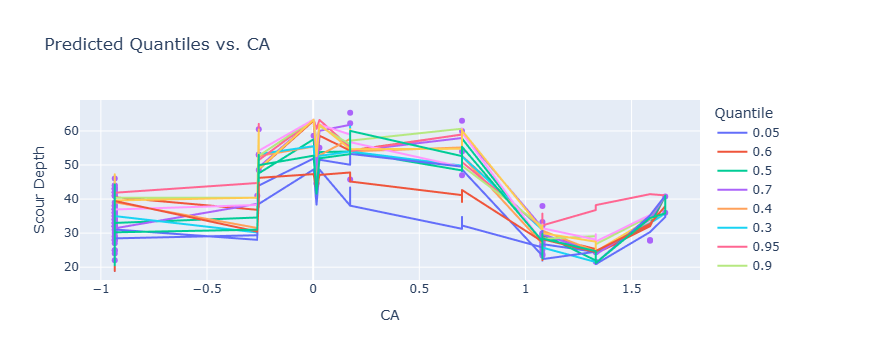

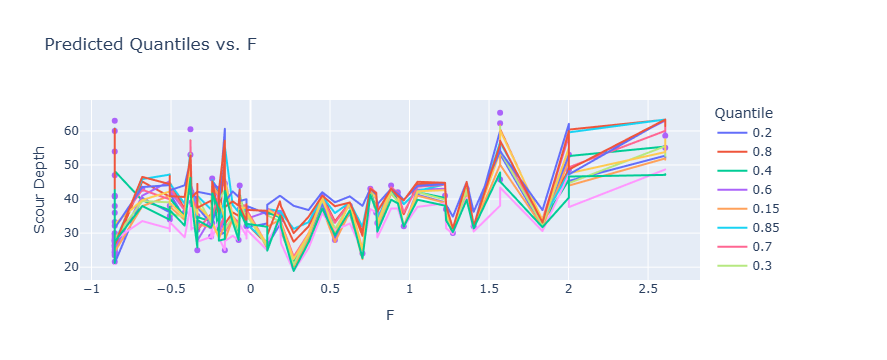

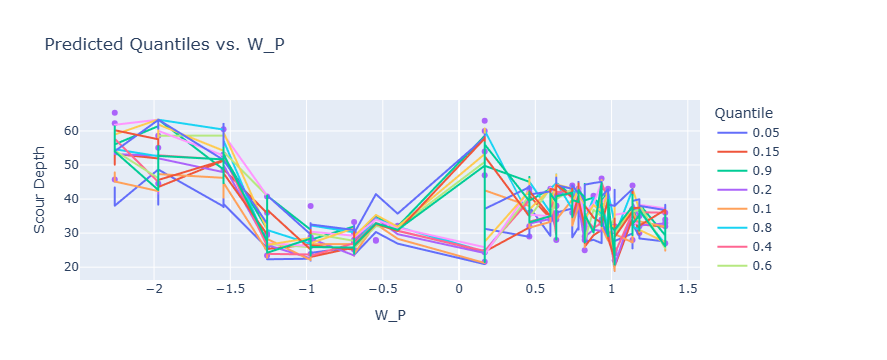

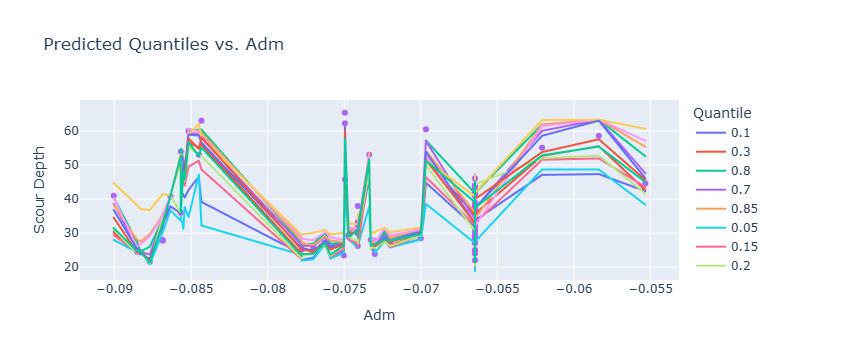

In [22]:
evaluation_features(predictions_GPBoost_df,X_test)

# **Uncertainity evaluation with NGBoost**

In [23]:
# Correct best_params assignment
best_params = get_best_model_params(best_scores_autosampler, 'NGBoost')

# DataFrame to store predictions
predictions_NGB_df = pd.DataFrame()

# Remove 'Score' and 'Dist' if present in best_params
for key in ['Score', 'Dist']:
    best_params.pop(key, None)

# Update params with model settings
best_params.update({
    'Dist': Normal,
    'Score': LogScore,
    'random_state': 42,
    'verbose': True
})

# Initialize and fit the NGBoost model once
model = NGBRegressor(**best_params)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
pred_dist = model.pred_dist(X_test)

# Extract the mean (mu) and standard deviation (sigma) of the predicted distributions
mu = pred_dist.loc    # Mean predictions
sigma = pred_dist.scale  # Standard deviation predictions

# Define the quantiles you want to predict
quantiles = [0.05, 0.1, 0.15, 0.2, 0.3,
             0.4, 0.5, 0.6, 0.7, 0.8,
             0.85, 0.9, 0.95]

# For each quantile, compute predictions
for q in quantiles:
    # Calculate the z-score for the desired quantile
    z = norm.ppf(q)
    
    # Compute the quantile prediction per sample
    predictions = mu + z * sigma
    
    # Add predictions to the DataFrame
    predictions_NGB_df[q] = predictions

# Add actual target values to the DataFrame
predictions_NGB_df['Actual'] = y_test.values.ravel()

# Print the DataFrame with predictions for each quantile
print(predictions_NGB_df.head())

[iter 0] loss=3.6975 val_loss=0.0000 scale=1.0000 norm=7.9235
[iter 100] loss=1.4093 val_loss=0.0000 scale=1.0000 norm=1.1076
[iter 200] loss=0.7770 val_loss=0.0000 scale=1.0000 norm=0.7147
[iter 300] loss=0.5508 val_loss=0.0000 scale=0.5000 norm=0.3450
[iter 400] loss=0.3035 val_loss=0.0000 scale=0.2500 norm=0.1394
        0.05        0.1       0.15        0.2        0.3        0.4  \
0  32.858365  32.921668  32.964377  32.998322  33.053595  33.100824   
1  36.345193  36.420305  36.470983  36.511261  36.576846  36.632886   
2  33.949294  34.122416  34.239220  34.332053  34.483216  34.612379   
3  35.086902  35.326170  35.487603  35.615905  35.824824  36.003337   
4  50.772036  50.801025  50.820583  50.836128  50.861440  50.883068   

         0.5        0.6        0.7        0.8       0.85        0.9  \
0  33.144968  33.189112  33.236340  33.291614  33.325558  33.368268   
1  36.685265  36.737645  36.793685  36.859270  36.899547  36.950225   
2  34.733104  34.853830  34.982993  35.134

First few lower quantile predictions: [32.85836499 36.34519267 33.94929418 35.08690235 50.77203581]
First few median quantile predictions: [33.14496783 36.68526523 34.73310442 36.17018948 50.90328365]
First few upper quantile predictions: [33.43157066 37.02533779 35.51691465 37.25347661 51.03453149]
Coverage of 90% prediction interval: 24.21%


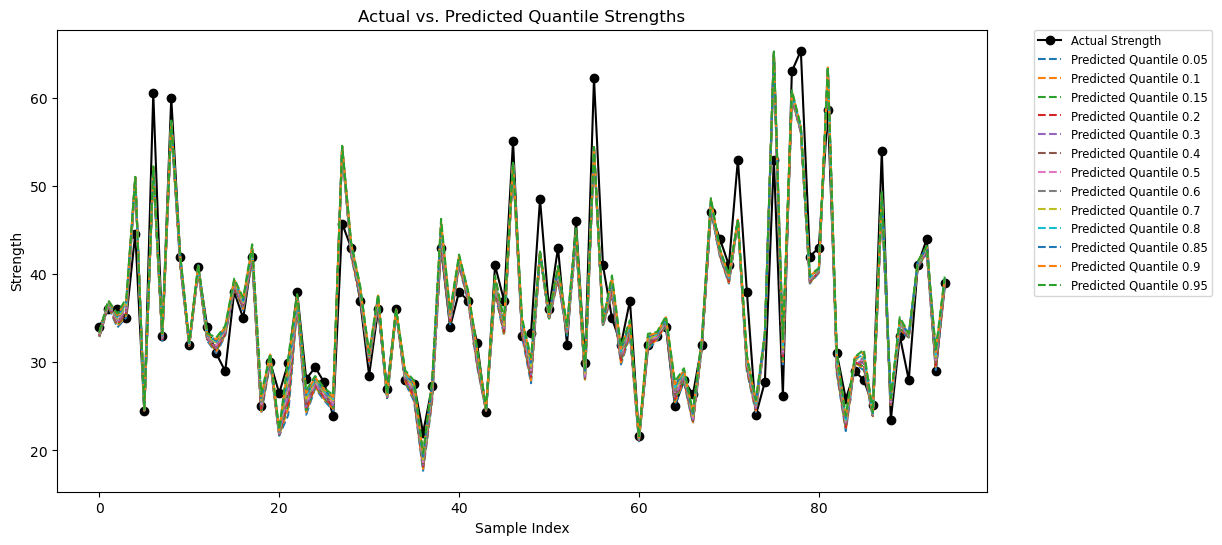

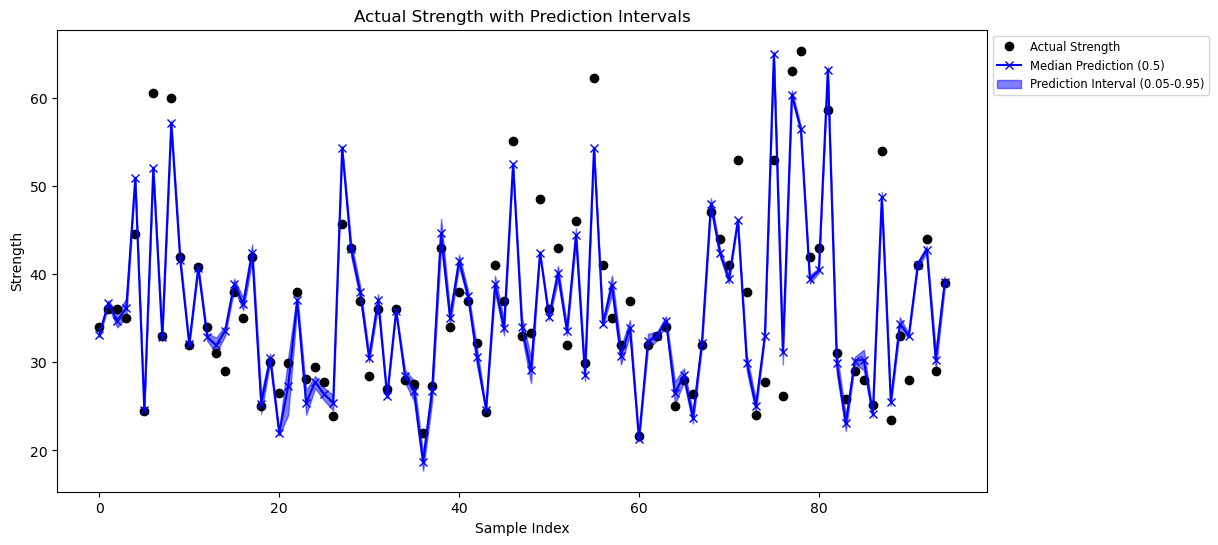

In [24]:
evaluation (predictions_NGB_df)

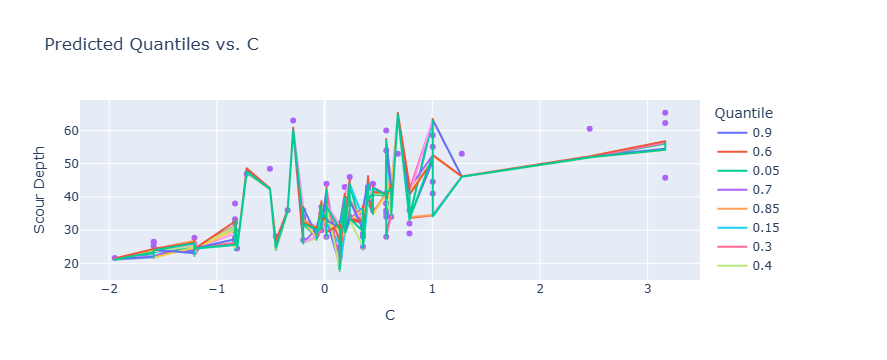

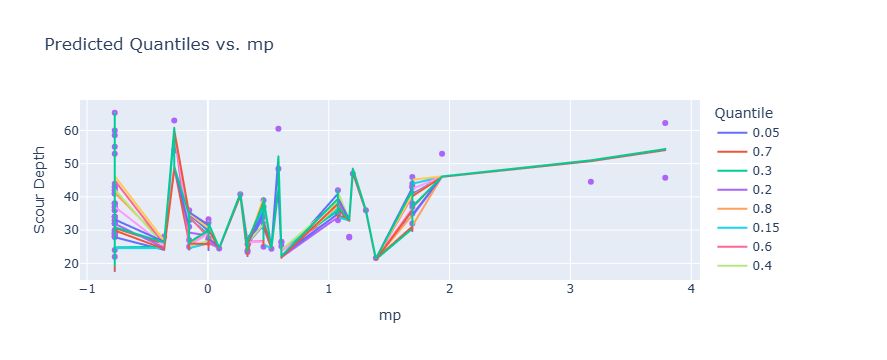

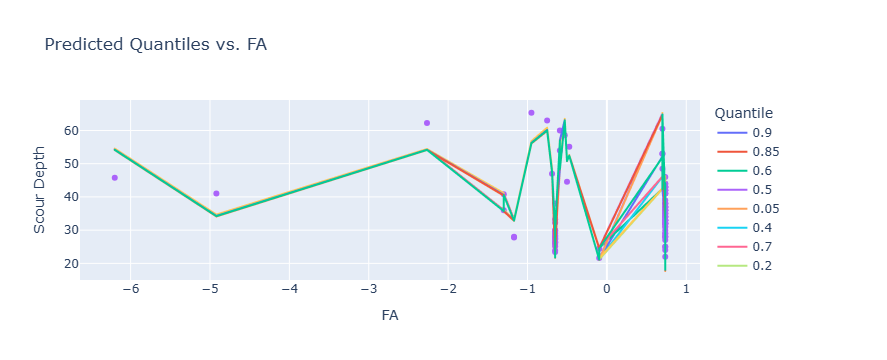

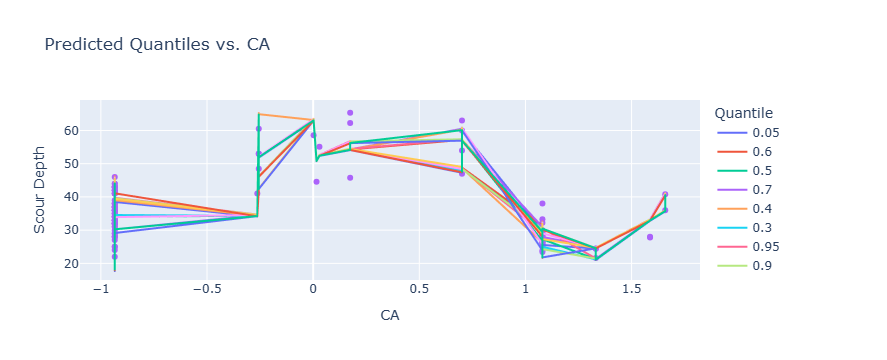

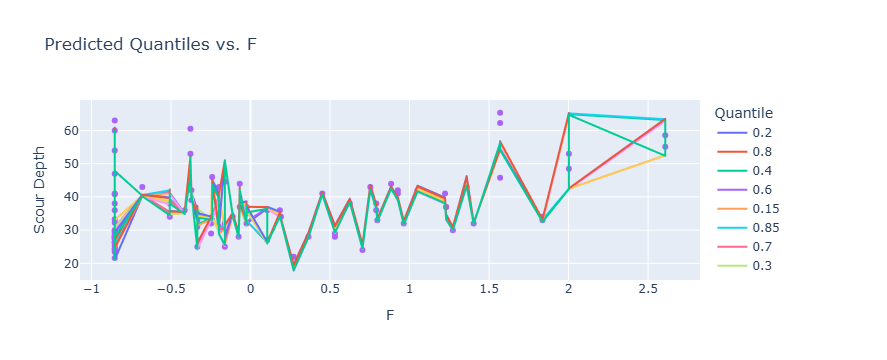

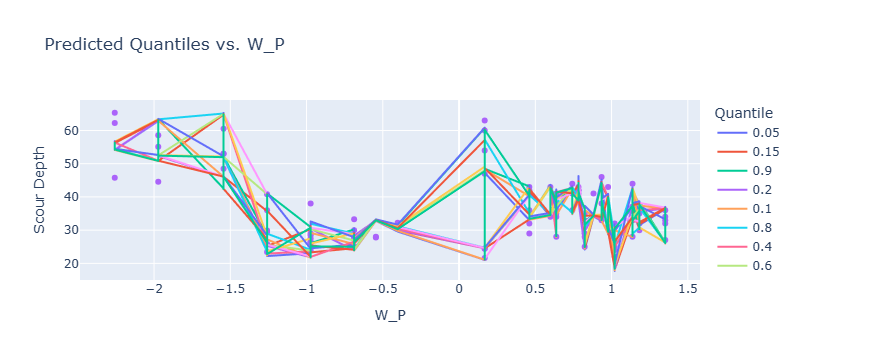

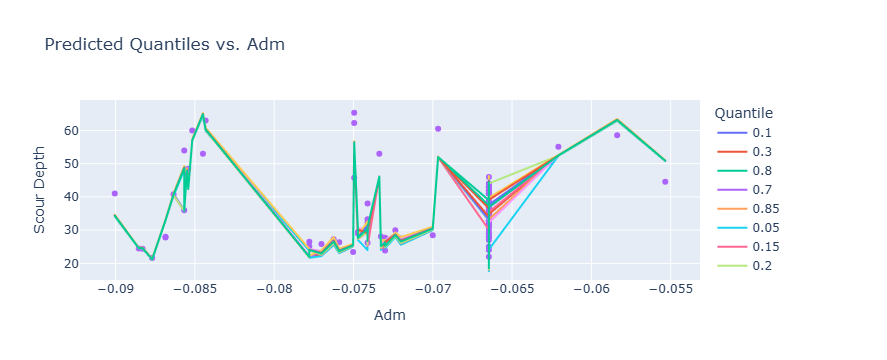

In [25]:
evaluation_features(predictions_NGB_df,X_test)

# **Probablistic distributions with NGBoost**

In [26]:
# Assuming best_params is obtained correctly
best_params = get_best_model_params(best_scores_autosampler, 'NGBoost')

# Remove any conflicting parameters from best_params
incompatible_keys = ['Dist', 'Score']
for key in incompatible_keys:
    best_params.pop(key, None)

# Initialize NGBoost model with best_params
ngb_model = NGBRegressor(Dist=Normal, **best_params)

# Fit the model
ngb_model.fit(X_train, y_train)

# Predict the distribution
pred_dist = ngb_model.pred_dist(X_test)

# Extract mean and standard deviation
predictions_NGB_df = pd.DataFrame({
    'Mean': pred_dist.loc,
    'StdDev': pred_dist.scale,
    'Actual': y_test.values.ravel()
})

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, pred_dist.loc)
print(f"Mean Squared Error: {mse:.2f}")

# Print the DataFrame with mean and standard deviation
print(predictions_NGB_df.head())

[iter 0] loss=3.6975 val_loss=0.0000 scale=1.0000 norm=7.9235
[iter 100] loss=1.3375 val_loss=0.0000 scale=1.0000 norm=1.0408
[iter 200] loss=0.8068 val_loss=0.0000 scale=1.0000 norm=0.7231
[iter 300] loss=0.5593 val_loss=0.0000 scale=0.5000 norm=0.3238
[iter 400] loss=0.3336 val_loss=0.0000 scale=0.5000 norm=0.2717
Mean Squared Error: 10.04
        Mean    StdDev  Actual
0  33.117591  0.136947    34.0
1  36.391496  0.144251    36.0
2  34.560545  0.606696    36.0
3  35.339492  0.207057    35.0
4  43.505887  0.057830    44.6


[iter 0] loss=3.6975 val_loss=0.0000 scale=1.0000 norm=7.9235
[iter 100] loss=1.4073 val_loss=0.0000 scale=1.0000 norm=1.1028
[iter 200] loss=1.0070 val_loss=0.0000 scale=1.0000 norm=0.9274
[iter 300] loss=0.5725 val_loss=0.0000 scale=0.2500 norm=0.1704
[iter 400] loss=0.3256 val_loss=0.0000 scale=0.5000 norm=0.2798
DataFrame Columns: Index(['Mean', 'StdDev', 'Actual'], dtype='object')
Mean Squared Error: 8.56


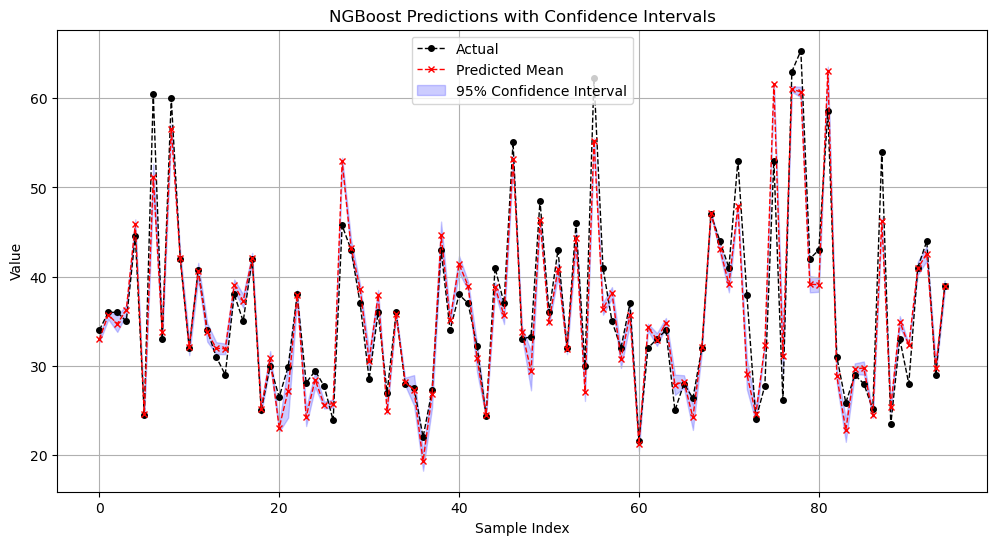

In [28]:
# Assuming best_params is obtained correctly
best_params = get_best_model_params(best_scores_autosampler, 'NGBoost')

# Initialize NGBoost model with best_params
ngb_model = NGBRegressor(Dist=Normal, **best_params)

# Fit the model
ngb_model.fit(X_train, y_train)

# Predict the distribution
pred_dist = ngb_model.pred_dist(X_test)

# Extract mean and standard deviation
predictions_NGB_df = pd.DataFrame({
    'Mean': pred_dist.loc,
    'StdDev': pred_dist.scale,
    'Actual': y_test.values.ravel()
})

# Print the DataFrame columns to verify
print("DataFrame Columns:", predictions_NGB_df.columns)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, pred_dist.loc)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the actual vs predicted mean with confidence intervals
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y_test.values, label='Actual', color='black', marker='o', linestyle='dashed', linewidth=1, markersize=4)

# Plot predicted mean
plt.plot(predictions_NGB_df['Mean'], label='Predicted Mean', color='red', marker='x', linestyle='dashed', linewidth=1, markersize=4)

# Calculate and plot confidence intervals
confidence_interval = 1.96 * predictions_NGB_df['StdDev']  # 95% confidence interval
plt.fill_between(
    np.arange(len(predictions_NGB_df)),
    predictions_NGB_df['Mean'] - confidence_interval,
    predictions_NGB_df['Mean'] + confidence_interval,
    color='blue', alpha=0.2, label='95% Confidence Interval'
)

# Add labels and legend
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('NGBoost Predictions with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()